#MULTICLASS:
#DIGIT CLASSIFICATION USING NEURAL NETWORKS:0️⃣1️⃣2️⃣3️⃣4️⃣5️⃣6️⃣7️⃣8️⃣9️⃣

In [50]:
#Importing requrired libraries:🚪
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)



In [ ]:
!unzip "/content/Files 2.zip"

In [52]:
#Lodading dataset:📂
X, y = load_data()

In [53]:
#Inspecting data🧐
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [54]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [55]:
#Checking dimension of data:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))


The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


##Visualizing 200 digits out of 5000📊📈📉

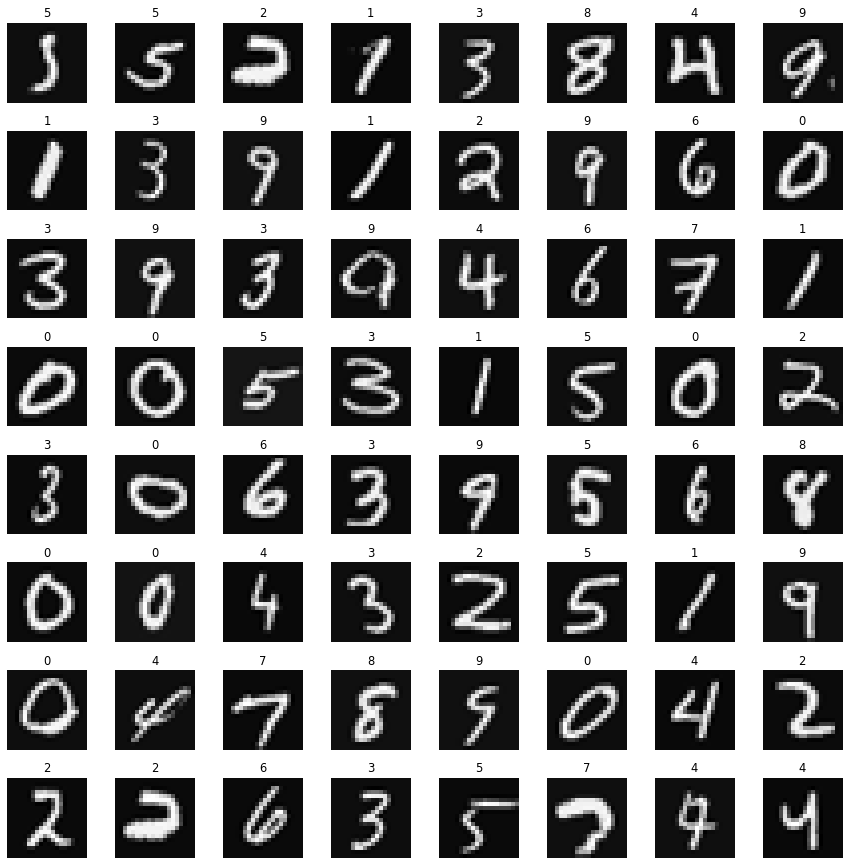

In [56]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(12,12))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [57]:
#model for forward_prop_nn for inference
NN_model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),     
        Dense(25,activation="relu",name="Layer1"),
        Dense(15,activation="relu",name="Layer2"),
        Dense(10,activation="linear",name="Layer3")      
        
    ], name = "my_model" 
)  

In [58]:
#summary of model📋
NN_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 25)                10025     
                                                                 
 Layer2 (Dense)              (None, 15)                390       
                                                                 
 Layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [59]:
#defining layers 
[layer1, layer2, layer3] = NN_model.layers

In [60]:
#Getting weights and getting Shape of parameters W,b:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [62]:
#Compiling loss and optimizer(uses adam algo rather than gradient descent) 
NN_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)


In [63]:
#Fitting data to train in model 🚴🏻‍♂️
NN_model.fit(
    X,y,
    epochs=40                  #iteration for optimization of w and b.
)

Epoch 1/40
157/157 [==============================] - 1s 3ms/step - loss: 1.6801
Epoch 2/40
157/157 [==============================] - 0s 3ms/step - loss: 0.6796
Epoch 3/40
157/157 [==============================] - 0s 3ms/step - loss: 0.4456
Epoch 4/40
157/157 [==============================] - 0s 3ms/step - loss: 0.3576
Epoch 5/40
157/157 [==============================] - 0s 3ms/step - loss: 0.3052
Epoch 6/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2784
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2557
Epoch 8/40
157/157 [==============================] - 1s 3ms/step - loss: 0.2344
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2214
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2081
Epoch 11/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 12/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1845
Epoch 13/40
157/157 [====

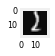

 predicting a Two: 
[[ -7.71   0.84   2.92  -0.96 -10.43  -8.84  -2.47  -0.83  -6.25 -10.39]]
 Largest Prediction index: 2


In [64]:
#Prediction produce z_i
image_of_two = X[1015]
display_digit(image_of_two)

prediction = NN_model.predict(image_of_two.reshape(1,400))  

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


In [65]:
#probability output and total sum of output prob
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[2.06e-05 1.07e-01 8.52e-01 1.75e-02 1.36e-06 6.62e-06 3.87e-03 1.99e-02
  8.88e-05 1.42e-06]]
Total of predictions: 1.000


In [66]:
#actual digit predicted
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


##VISUALIZATION OF PREDICTED DIGIT👍🏆

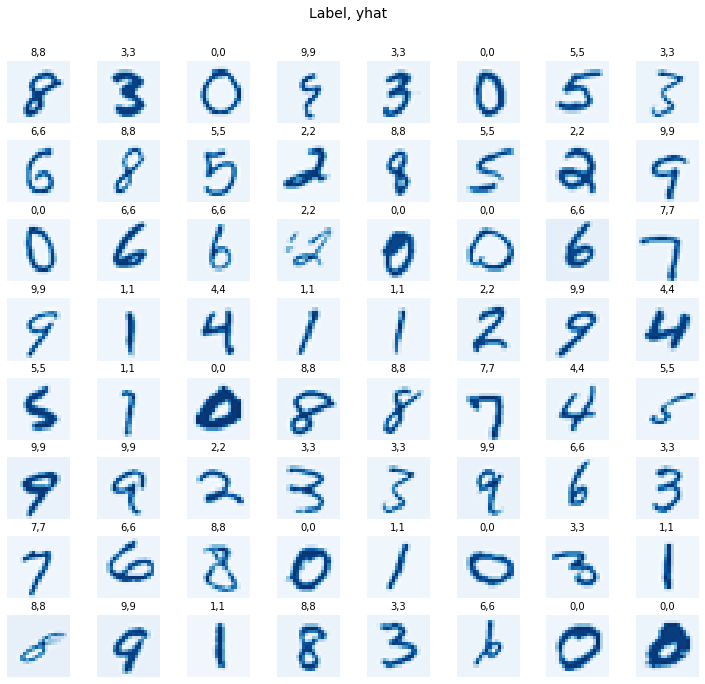

In [67]:
#64 DIGITS ARE TAKEN 8,8
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='Blues')
    
    # Predict using the Neural Network
    prediction = NN_model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

#INCORRECT OUTPUT🙈😫

32 errors out of 5000 images


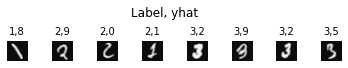

In [68]:
print( f"{display_errors(NN_model,X,y)} errors out of {len(X)} images")